In [1]:
import cv2
from api_calls import text_from_image, read_text
from google.cloud import vision
from google.cloud.vision import types
from google.cloud import texttospeech

import time

from matplotlib import pyplot as plt

from PIL import Image

from Levenshtein import distance as levenshtein_distance

import numpy as np

from collections import defaultdict

import string

import simpleaudio as sa

from pydub import AudioSegment
from pydub.playback import play
import io

import pkg_resources
from symspellpy import SymSpell, Verbosity



In [28]:
def grab_n_frames(n):
    cap = cv2.VideoCapture(0)
    
    frames = []
    responses = []
    
    #client = vision.ImageAnnotatorClient()
    
    
    for i in range(n):
        print(i)

        ret, frame = cap.read()
        if not ret:
            print("Frame not read")
            continue
        
        #image = types.Image(content=cv2.imencode('.jpg', frame)[1].tostring())
        #doc_text_feature = vision.types.Feature(
        #    type=vision.enums.Feature.Type.DOCUMENT_TEXT_DETECTION)
        #request = types.AnnotateImageRequest(image=image, features=[doc_text_feature])
        #request = {'image':image,'features':[doc_text_feature]}
        #response = client.text_detection(image=image)
        #response = client.annotate_image(request)
        
        frames.append(frame)
        #responses.append(response)
    
    cap.release()
    cv2.destroyAllWindows()
    
    #for frame in frames:
    #    image = types.Image(content=cv2.imencode('.jpg', frame)[1].tostring())
    #    response = client.text_detection(image=image)
    #    responses.append(response)
    
    return frames#, responses


start = time.time()
#frames, responses = grab_n_frames(10)
frames=grab_n_frames(30)
print(time.time() - start)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
1.709496021270752


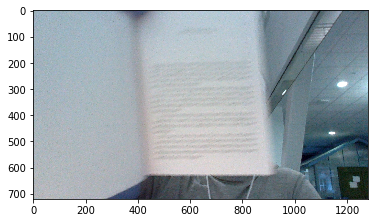

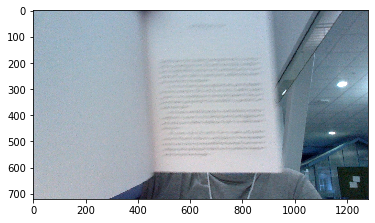

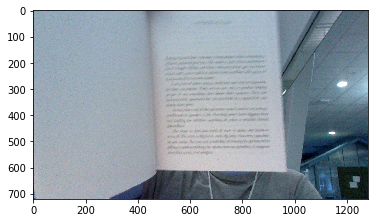

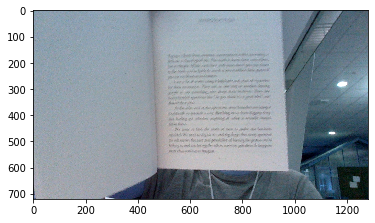

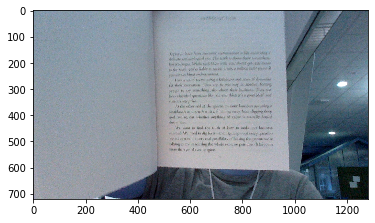

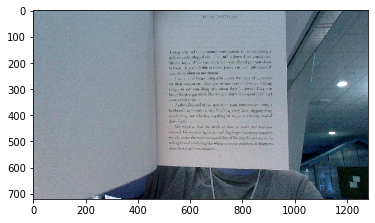

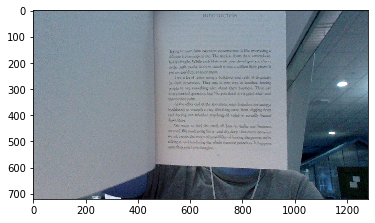

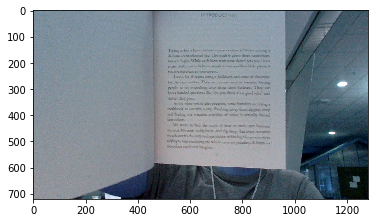

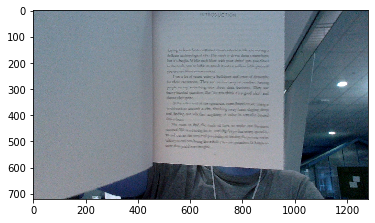

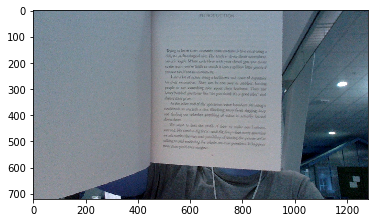

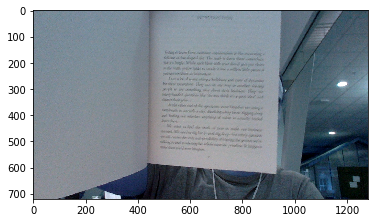

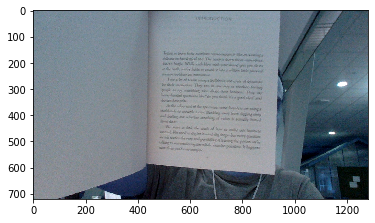

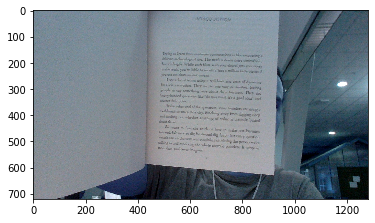

In [40]:
client = vision.ImageAnnotatorClient()

#doc_text_feature = vision.types.Feature(
#            type=vision.enums.Feature.Type.DOCUMENT_TEXT_DETECTION)

responses = []
for frame in frames[17:]:
    plt.imshow(frame)
    plt.show()
    
    image = types.Image(content=cv2.imencode('.jpg', frame)[1].tostring())
    #request = types.AnnotateImageRequest(image=image, features=[doc_text_feature])
    response = client.text_detection(image=image)
    responses.append(response)

In [41]:
texts = [x.full_text_annotation.text for x in responses]
for i, text in enumerate(texts):
    print(i, text)

0 
1 
2 
3 fro
poe so y edg
aoly lotied
d fuding o wheder aing f e
W ww w fd de f koe w e r
d.WA ehwdfor d any oo gueatios
aseres she ry el y y g geee
talkngn sd ndeing ibe whde ezee pind e happere
Hwas then you'd eser agne

4 feyiy lean fe i e
e s d se he rd ay den the hen
agle, While dow we g d g yw
othe tth youis Halds to sme nte o wle
y ul an intn
for of teas wing a bulldozes snd rate f dyi
f de aion ley ae, i wey or enhe focg
jeigle 19 ay smething nice alM dwir lusines They we
bvy hnded quedinos like "da you shiok it's a ynd es and
sbatter sheir prize
obush to uncith a ciry, Binching away from digng deey
and finding out whether anyihing of vale is actually buned
down there.
We want io fud the truth of how to make our business
iereed We need to dig for it-and dig deep but every question
we ask canies the very roal possibility of biasing the penson we're
talling to and rendering the whole exercise pointless. It happens
more than you'ld ever imagine.

5 INTROOUCTION
Tring to leam fro

In [50]:
[word.description for word in responses[-1].text_annotations[1:]]

['INTRODUCTION',
 'Trving',
 'to',
 'leam',
 'from',
 'customer',
 'conversations',
 'is',
 'like',
 'excavating',
 'a',
 'delicate',
 'aschacological',
 'site',
 'The',
 'truth',
 'is',
 'down',
 'there',
 'vomewbere,',
 'but',
 "it's",
 'fragile.',
 'While',
 'each',
 'blow',
 'with',
 'your',
 'shovel',
 'gets',
 'you',
 'closer',
 'to',
 'the',
 'truth,',
 'yoa',
 're',
 'liable',
 'to',
 'smash',
 'it',
 'into',
 'a',
 'million',
 'fittle',
 'pieces',
 'if',
 'pou',
 'use',
 'too',
 'blunt',
 'an',
 'instument',
 'I',
 'see',
 'a',
 'lot',
 'of',
 'teams',
 'using',
 'a',
 'bulldozer',
 'and',
 'crate',
 'of',
 'dynamite',
 'for',
 'their',
 'excavation',
 'They',
 'are,',
 'in',
 'one',
 'way',
 'or',
 'another,',
 'forcing',
 'people',
 'to',
 'say',
 'somethung',
 'nice',
 'about',
 'their',
 'business',
 'They',
 'use',
 'heavy-handed',
 'questions',
 'like',
 '"do',
 'you',
 'think',
 "it's",
 'a',
 'good',
 'idea"',
 'and',
 'shatter',
 'their',
 'prine.',
 'Ar',
 'che',
 'o

In [27]:
levenshtein_distance(texts[0],texts[1]), levenshtein_distance(texts[1],texts[2]), levenshtein_distance(texts[0],texts[2])

(12, 12, 10)

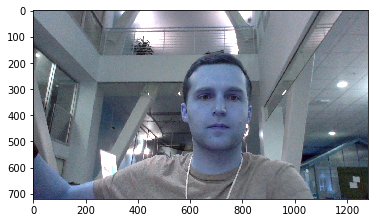

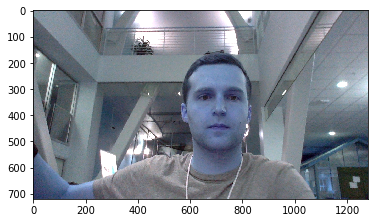

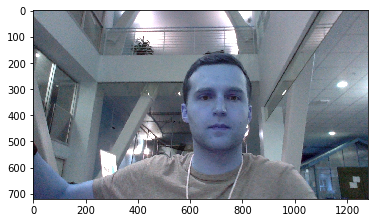

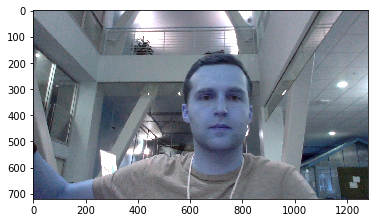

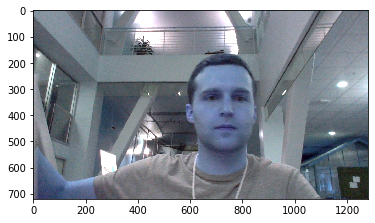

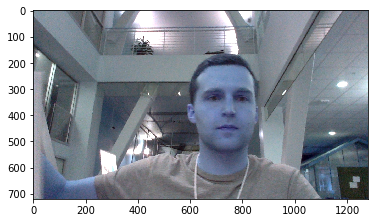

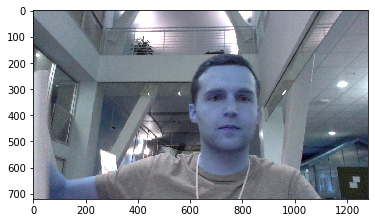

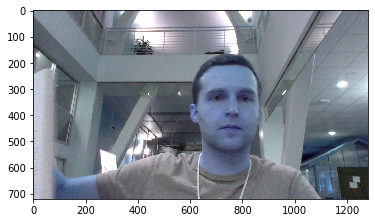

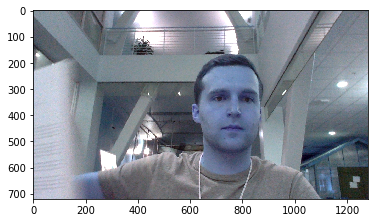

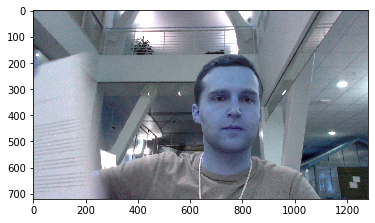

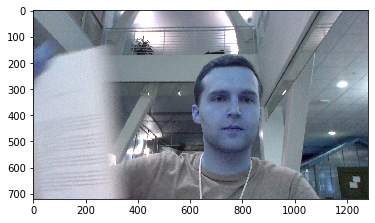

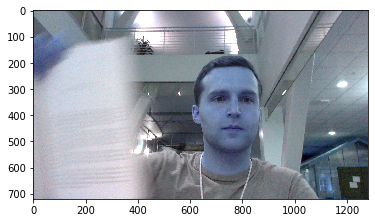

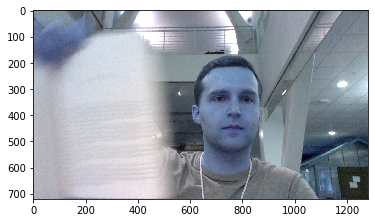

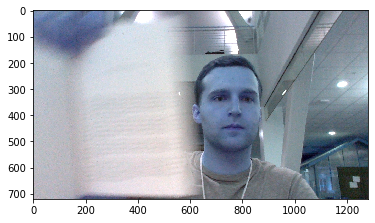

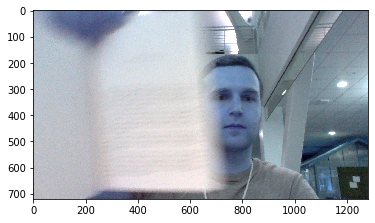

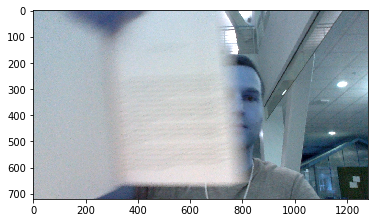

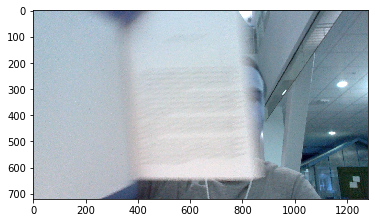

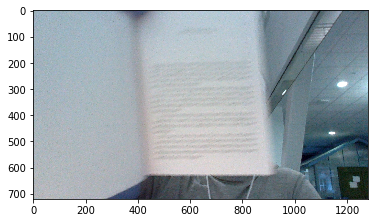

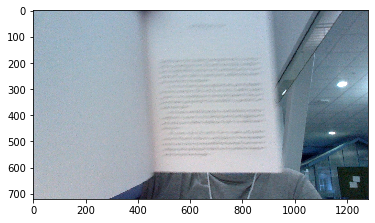

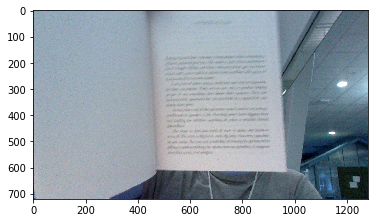

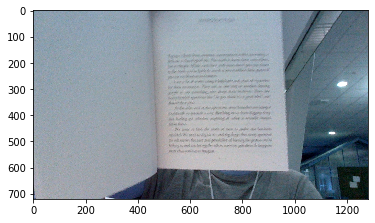

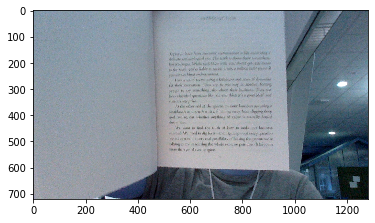

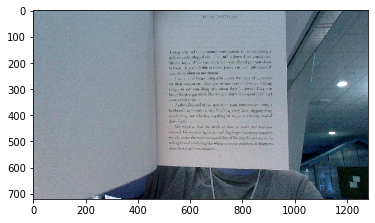

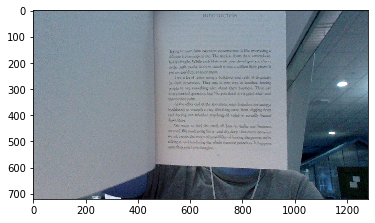

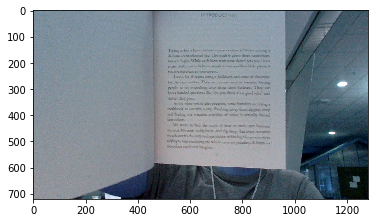

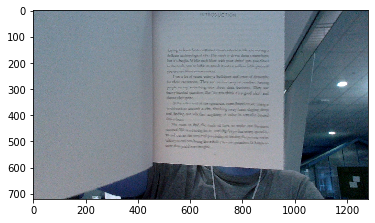

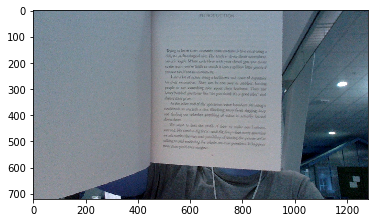

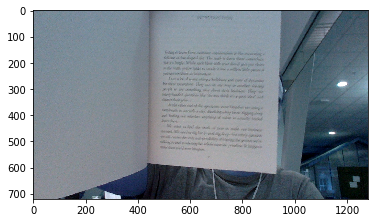

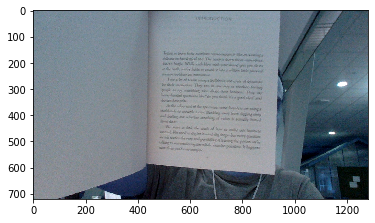

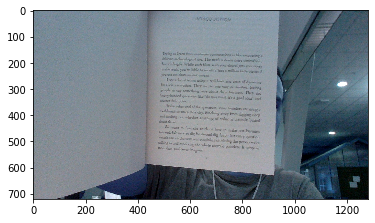

In [31]:
for frame in frames:
    plt.imshow(frame)
    plt.show()

#im = Image.fromarray(frames[9])
#im.save('test.png')

In [35]:
for i in range(len(frames) - 1):
    print(i, np.linalg.norm(frames[i] - frames[i+1]))

0 279851.2701489847
1 279485.7430693022
2 276675.3565552957
3 277221.3705542919
4 280269.5616420021
5 279401.9035153483
6 278345.23083753383
7 278864.5696516501
8 280567.4869563471
9 279147.9094978144
10 285220.95550292236
11 276687.44761011476
12 280326.7752320495
13 280957.11151704274
14 180538.4278124743
15 334104.5697577332
16 131336.7495676667
17 276036.66075722623
18 152461.501071582
19 158646.46266778215
20 182463.91904428668
21 200571.4738690425
22 216464.7308246773
23 226392.95691783348
24 236050.62815209792
25 250510.6935881181
26 271791.013284104
27 275494.7351493309
28 283075.9501653222


In [3]:
with open('../wp_1gram.txt') as f:
    lines = f.readlines()
processed_lines = [l.strip().split('\t') for l in lines]

In [4]:
word_counts = defaultdict(int)
for entry in processed_lines:
    #print(entry)
    try:
        count, word = entry
    except:
        print(entry)
        continue
    word_counts[word.lower()] += int(count)

['344']
['47']
['7']


In [5]:
#word_counts["s'"]
#"it's".translate(None, string.punctuation)

remove_punctuation = str.maketrans('', '', string.punctuation)

#s = 'string with "punctuation" inside of it! Does this work? I hope so.'

# pass the translator to the string's translate method.
#print("It's".translate(translator))

def mean_log_count(words):
    return np.mean([np.log(1+word_counts[w.lower().translate(remove_punctuation)]) for w in words])


In [109]:
#texts = [x.full_text_annotation.text for x in responses]
for i in range(len(responses)):
    words = [word.description for word in responses[i].text_annotations[1:]]
    print(i,len(words))
    print(words)
    print(mean_log_count(words))

0 0
[]
nan
1 0
[]
nan
2 0
[]
nan
3 52
['fro', 'poe', 'so', 'y', 'edg', 'aoly', 'lotied', 'd', 'fuding', 'o', 'wheder', 'aing', 'f', 'e', 'W', 'ww', 'w', 'fd', 'de', 'f', 'koe', 'w', 'e', 'r', 'd.WA', 'ehwdfor', 'd', 'any', 'oo', 'gueatios', 'aseres', 'she', 'ry', 'el', 'y', 'y', 'g', 'geee', 'talkngn', 'sd', 'ndeing', 'ibe', 'whde', 'ezee', 'pind', 'e', 'happere', 'Hwas', 'then', "you'd", 'eser', 'agne']
7.843768982699833
4 154
['feyiy', 'lean', 'fe', 'i', 'e', 'e', 's', 'd', 'se', 'he', 'rd', 'ay', 'den', 'the', 'hen', 'agle,', 'While', 'dow', 'we', 'g', 'd', 'g', 'yw', 'othe', 'tth', 'youis', 'Halds', 'to', 'sme', 'nte', 'o', 'wle', 'y', 'ul', 'an', 'intn', 'for', 'of', 'teas', 'wing', 'a', 'bulldozes', 'snd', 'rate', 'f', 'dyi', 'f', 'de', 'aion', 'ley', 'ae,', 'i', 'wey', 'or', 'enhe', 'focg', 'jeigle', '19', 'ay', 'smething', 'nice', 'alM', 'dwir', 'lusines', 'They', 'we', 'bvy', 'hnded', 'quedinos', 'like', '"da', 'you', 'shiok', "it's", 'a', 'ynd', 'es', 'and', 'sbatter', 'sheir

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:


max_edit_distance_dictionary = 2
prefix_length = 7
# create object
sym_spell = SymSpell(max_edit_distance_dictionary, prefix_length)
# load dictionary
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_bigramdictionary_en_243_342.txt")
# term_index is the column of the term and count_index is the
# column of the term frequency
if not sym_spell.load_dictionary(dictionary_path, term_index=0,
                                 count_index=1):
    print("Dictionary file not found")

if not sym_spell.load_bigram_dictionary(bigram_path, term_index=0,
                                        count_index=2):
    print("Bigram dictionary file not found")



0


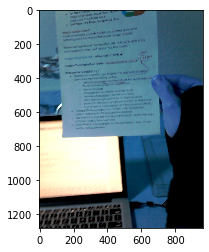

Len:  147
Mean log count:  6.496408049601589
1


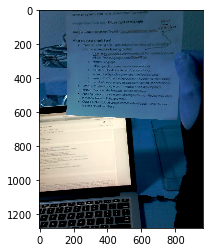

Len:  109
Mean log count:  8.295019399456898
2


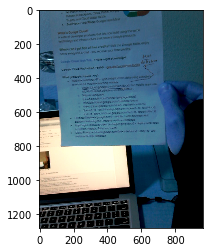

Len:  149
Mean log count:  9.351601576102128
3


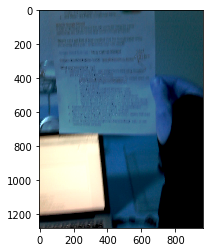

4


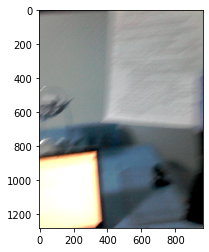

5


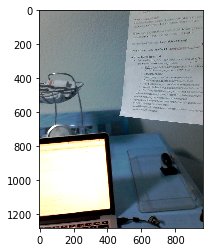

Len:  130
Mean log count:  9.302867319319649
6


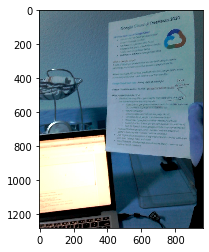

Len:  86
Mean log count:  6.218572748101909
7


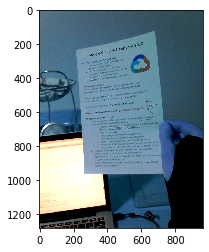

Len:  182
Mean log count:  8.943831435062172
8


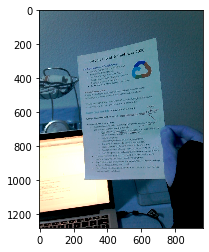

Len:  192
Mean log count:  9.01445721617659
9


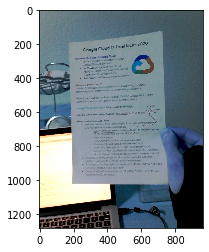

Len:  176
Mean log count:  7.909890263232998
6 9.01445721617659 9.01445721617659 192













































Google Cloud @ TreeHacks 2020
API Prize: Best Use of Google Cloud
Use any Google Cloud product in your
project (Firebase countsl)
tet Place: Googie Neat Mini Cloud
Patagonia Backpack Cloud Pilow, Acrylic
Trophy ard Cloud Water Botle
2nd Place/ 3rd Place: Google Nest Minis
What in Google Cloud?
A sute of devefoper produucts that lets you build using
technology and infrastructure that powers Google products
same
Where can I get $50 of free credits? Visit the Google table enjoy
some swag and a chat and recerve your free credits
Hat
Google Cloud Tech Talk-Friday night at midnight
de kcton
Google Cloud Hackathan Toolkit goo gle/hackathon-toolkit
What products should I try?
• Machine Learning APts gain insights from data using Google's
pre-trained mchine learning models.
Vision (cloud.google com/vision/docs), For mobile apps use
ML KIt (firebase google.com/dosm-ku

In [11]:
n = 10

#def read_best_of_n(n):
cap = cv2.VideoCapture(0)

responses = []
client = vision.ImageAnnotatorClient()

longest = 0
lengths = []

scores = []

full_texts = []

word_lists = []

for i in range(n):
    print(i)

    ret, frame = cap.read()
    if not ret:
        print("Frame not read")
        continue
    frame = np.rot90(frame)

    image = types.Image(content=cv2.imencode('.jpg', frame)[1].tostring())
    response = client.text_detection(image=image)
    
    words = [word.description for word in response.text_annotations[1:]]
    num_words = len(words)
    
    
    plt.imshow(frame)
    plt.show()
    
    if num_words == 0: continue
        
    word_lists.append(words)

    responses.append(response)

    
    print('Len: ', num_words)
    lengths.append(num_words)
    if num_words > longest: longest = num_words

    score = mean_log_count(words)
    scores.append(score)
    print('Mean log count: ', score)
    full_text = response.full_text_annotation.text
    #print(full_text)
    full_texts.append(full_text)

# Criterion: pick the best frame that's within 5% of the number of words of the longest frame
best_long_index = None
highest_long_score = 0
for i in range(len(responses)):
    if lengths[i] >= .95 * longest:
        if scores[i] > highest_long_score:
            best_long_index = i
            highest_long_score = scores[i]

print(best_long_index, highest_long_score, scores[best_long_index], lengths[best_long_index])
best_text = full_texts[best_long_index]
best_words = word_lists[best_long_index]


best_words_fixed = []
for w in best_words:
    #print(w)
    
    exclude_word = False
    for c in w:
        if not (c.isupper() or c.islower()): 
            exclude_word = True
            break
    #print(exclude_word)
            
    if exclude_word:
        best_words_fixed.append(w)
        print()
        continue
        
    suggestions = sym_spell.lookup(w, Verbosity.CLOSEST,
                               max_edit_distance=2, transfer_casing=True)
    #print(suggestions[0])
    #print()
    
    if len(suggestions) > 0: 
        corrected_word = (suggestions[0]._term)
        if w[0].isupper() and w[0].lower() == corrected_word[0].lower():
            corrected_word = w[0] + corrected_word[1:]
        best_words_fixed.append(corrected_word)
    else: best_words_fixed.append(w)

best_full_text = ' '.join(best_words_fixed)


client = texttospeech.TextToSpeechClient()
synthesis_input = texttospeech.types.SynthesisInput(text=best_full_text)

print(best_text)
print(best_full_text)




# Build the voice request, select the language code ("en-US") and the ssml
# voice gender ("neutral")
voice = texttospeech.types.VoiceSelectionParams(
    language_code='en-US',
    ssml_gender=texttospeech.enums.SsmlVoiceGender.NEUTRAL)

# Select the type of audio file you want returned
audio_config = texttospeech.types.AudioConfig(
    audio_encoding=texttospeech.enums.AudioEncoding.MP3)

# Perform the text-to-speech request on the text input with the selected
# voice parameters and audio file type
response = client.synthesize_speech(synthesis_input, voice, audio_config)
audio = response.audio_content
song = AudioSegment.from_file(io.BytesIO(audio), format="mp3")
play(song)


cap.release()
cv2.destroyAllWindows()

#read_best_of_n(10)

In [133]:
voice = texttospeech.types.VoiceSelectionParams(
    language_code='en-US',
    ssml_gender=texttospeech.enums.SsmlVoiceGender.NEUTRAL)

# Select the type of audio file you want returned
audio_config = texttospeech.types.AudioConfig(
    audio_encoding=texttospeech.enums.AudioEncoding.MP3)

# Perform the text-to-speech request on the text input with the selected
# voice parameters and audio file type
response = client.synthesize_speech(synthesis_input, voice, audio_config)
audio = response.audio_content

#play_obj = sa.play_buffer(audio, 1, 2, 22050)

song = AudioSegment.from_file(io.BytesIO(audio), format="mp3")
play(song)

In [127]:
#len(audio)

468384

In [130]:
best_text

'Google Cloud @ TreeHacks 2020\nAPI Prize: Best Use of Google Cloud\n• Use any Googie Cloud product in your\nproject (Firebase counts)\n1st Place: Googie Nest Mini, Cloud\nPatagonia Backpack, Cloud Pilow, Acrylic\nTrophy, and Cloud Water Bottle\n• 2nd Place / 3rd Place: Google Nest Minis\nWhat is Google Cloud?\nA suite of developer products that lets you build using the same\ntechnology and infrastructure that powers Google products.\nWhere can I get $50 of free credits? Visit the Google table, enjoy\nsome swag and a chat - and receive your free credits.\nGoogle Cloud Tech Talk - Friday night at midnight\nHat\nde tect\nGoogle Cloud Hackathon Toolklt - goo gle/hacikathon-toolkit\nWhat products should I try?\n• Machine Learning APls - gain insights from data using Google\npre-trained machine iearning models.\no Vision (cloud.google.com/vision/docs). For mobile apps use\nML Kit (firebase goegle.com/docmkit).\no Natural Languege\n(cloud.google.com/natural-language/docs)\no Transiate (cloud

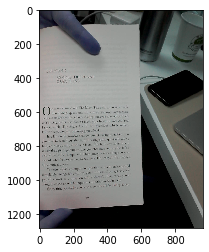

In [18]:
frameT = frame
plt.imshow(np.rot90(frame))
plt.show()

In [42]:
spaced_text = best_text.replace('\n', ' ')


print(spaced_text)

INTRODUCTION Trying to learn from customer conversations is like excavating a delicate archaeological site The truth is down there somewhere. but it's fragile. While each blow with your shovel gets you closer to the truth, you're liable to smash it into a million little pieces if you use too blunt an instrument I sec a lot of teams using a bulldozer and crate of dynamite for their excavation They are, in one way or another. forcing people to say something nice about their business They use heavy handed questions like "do you think it's a good idea" and shatter their prize. At the other end of the spectrum, some founders are using a toothbrush to unearth a city. flinching away from digging deep and finding out whether anything of value is acually buried down there We want to find the truth of how to make our business succeed We need to dig for it-and dig deep- but every question we ask carries the very real possibility of biasing the person we're talking to and rendering the whole exerc

In [59]:
def insert_periods(text):
    new_text = ""
    for i in range(len(text)):
        if text[i] == ' ' and i != len(text) - 1 and text[i+1].isupper():
            if i != 0 and text[i-1] != '.':
                new_text += '.'
        new_text += text[i]
    return new_text

In [60]:
spaced_and_perioded = insert_periods(spaced_text)
print(spaced_and_perioded)

INTRODUCTION. Trying to learn from customer conversations is like excavating a delicate archaeological site. The truth is down there somewhere. but it's fragile. While each blow with your shovel gets you closer to the truth, you're liable to smash it into a million little pieces if you use too blunt an instrument. I sec a lot of teams using a bulldozer and crate of dynamite for their excavation. They are, in one way or another. forcing people to say something nice about their business. They use heavy handed questions like "do you think it's a good idea" and shatter their prize. At the other end of the spectrum, some founders are using a toothbrush to unearth a city. flinching away from digging deep and finding out whether anything of value is acually buried down there. We want to find the truth of how to make our business succeed. We need to dig for it-and dig deep- but every question we ask carries the very real possibility of biasing the person we're talking to and rendering the whol

In [113]:
test_words = ['INTRODUCTION', 'Trving', 'to', 'leam', 'from', 'customer', 'conversations', 'is', 'like', 'excavating', 'a', 'delicate', 'aschacological', 'site', 'The', 'truth', 'is', 'down', 'there', 'vomewbere,', 'but', "it's", 'fragile.', 'While', 'each', 'blow', 'with', 'your', 'shovel', 'gets', 'you', 'closer', 'to', 'the', 'truth,', 'yoa', 're', 'liable', 'to', 'smash', 'it', 'into', 'a', 'million', 'fittle', 'pieces', 'if', 'pou', 'use', 'too', 'blunt', 'an', 'instument', 'I', 'see', 'a', 'lot', 'of', 'teams', 'using', 'a', 'bulldozer', 'and', 'crate', 'of', 'dynamite', 'for', 'their', 'excavation', 'They', 'are,', 'in', 'one', 'way', 'or', 'another,', 'forcing', 'people', 'to', 'say', 'somethung', 'nice', 'about', 'their', 'business', 'They', 'use', 'heavy-handed', 'questions', 'like', '"do', 'you', 'think', "it's", 'a', 'good', 'idea"', 'and', 'shatter', 'their', 'prine.', 'Ar', 'che', 'other', 'end', 'of', 'the', 'spectrum,', 'some', 'founders', 'are', 'using', 'a', 'touthbrush', 'to', 'unearth', 'a', 'city,', 'flinching', 'away', 'from', 'diging', 'deep', 'and', 'finding', 'out', 'whether', 'anything', 'of', 'value', 'is', 'actually', 'buried', 'down', 'there.', 'We', 'want', 'to', 'Snd', 'the', 'truth', 'of', 'how', 'to', 'make', 'our', 'business', 'succeed.', 'We', 'need', 'to', 'dig', 'for', 'n-and', 'dig', 'deep-but', 'every', 'question', 'we', 'ask', 'carries', 'the', 'very', 'real', 'possibiliry', 'of', 'biasing', 'the', 'person', "we're", 'talking', 'to', 'and', 'rendering', 'the', 'whole', 'exercise', 'pointless.', 'Iı', 'happens', 'more', 'than', 'you', 'd', 'ever', 'imagine.']

test_words_fixed = []
#for w in spaced_and_perioded.split(' '):
for w in test_words:
    print(w)
    
    exclude_word = False
    for c in w:
        if not (c.isupper() or c.islower()): 
            exclude_word = True
            break
    print(exclude_word)
            
    if exclude_word:
        test_words_fixed.append(w)
        print()
        continue
        
    suggestions = sym_spell.lookup(w, Verbosity.CLOSEST,
                               max_edit_distance=2, transfer_casing=True)
    print(suggestions[0])
    print()
    
    if len(suggestions) > 0: 
        corrected_word = (suggestions[0]._term)
        if w[0].isupper() and w[0].lower() == corrected_word[0].lower():
            corrected_word = w[0] + corrected_word[1:]
        test_words_fixed.append(corrected_word)
    else: test_words_fixed.append(w)

    

INTRODUCTION
False
introduction, 0, 61004175

Trving
False
Trying, 1, 57462639

to
False
to, 0, 12136980858

leam
False
team, 1, 171687825

from
False
from, 0, 2275595356

customer
False
customer, 0, 184406888

conversations
False
conversations, 0, 5859623

is
False
is, 0, 4705743816

like
False
like, 0, 520585287

excavating
False
excavating, 0, 647551

a
False
a, 0, 9081174698

delicate
False
delicate, 0, 3962661

aschacological
False
archaeological, 2, 3287086

site
False
site, 0, 844310242

The
False
the, 0, 23135851162

truth
False
truth, 0, 35345925

is
False
is, 0, 4705743816

down
False
down, 0, 224915894

there
False
there, 0, 701170205

vomewbere,
True

but
False
but, 0, 999899654

it's
True

fragile.
True

While
False
while, 0, 226194991

each
False
each, 0, 340892856

blow
False
blow, 0, 31344495

with
False
with, 0, 3183110675

your
False
your, 0, 2062066547

shovel
False
shovel, 0, 1031406

gets
False
gets, 0, 48807490

you
False
you, 0, 2996181025

closer
False
closer, 0

In [114]:
' '.join(test_words)

'INTRODUCTION Trving to leam from customer conversations is like excavating a delicate aschacological site The truth is down there vomewbere, but it\'s fragile. While each blow with your shovel gets you closer to the truth, yoa re liable to smash it into a million fittle pieces if pou use too blunt an instument I see a lot of teams using a bulldozer and crate of dynamite for their excavation They are, in one way or another, forcing people to say somethung nice about their business They use heavy-handed questions like "do you think it\'s a good idea" and shatter their prine. Ar che other end of the spectrum, some founders are using a touthbrush to unearth a city, flinching away from diging deep and finding out whether anything of value is actually buried down there. We want to Snd the truth of how to make our business succeed. We need to dig for n-and dig deep-but every question we ask carries the very real possibiliry of biasing the person we\'re talking to and rendering the whole exer

In [116]:
corrected = insert_periods(' '.join(test_words_fixed))
print(corrected)

Introduction. Trying to team from customer conversations is like excavating a delicate archaeological site. The truth is down there vomewbere, but it's fragile. While each blow with your shovel gets you closer to the truth, you re liable to smash it into a million little pieces if you use too blunt an instrument. I see a lot of teams using a bulldozer and crate of dynamite for their excavation. They are, in one way or another, forcing people to say something nice about their business. They use heavy-handed questions like "do you think it's a good idea" and shatter their prine. A che other end of the spectrum, some founders are using a toothbrush to unearth a city, flinching away from dining deep and finding out whether anything of value is actually buried down there. We want to. And the truth of how to make our business succeed. We need to dig for n-and dig deep-but every question we ask carries the very real possibility of biasing the person we're talking to and rendering the whole ex

In [ ]:
client = texttospeech.TextToSpeechClient()
synthesis_input = texttospeech.types.SynthesisInput(text=spaced_and_perioded)

# Build the voice request, select the language code ("en-US") and the ssml
# voice gender ("neutral")
voice = texttospeech.types.VoiceSelectionParams(
    language_code='en-US',
    ssml_gender=texttospeech.enums.SsmlVoiceGender.NEUTRAL)

# Select the type of audio file you want returned
audio_config = texttospeech.types.AudioConfig(
    audio_encoding=texttospeech.enums.AudioEncoding.MP3)

# Perform the text-to-speech request on the text input with the selected
# voice parameters and audio file type
response = client.synthesize_speech(synthesis_input, voice, audio_config)
audio = response.audio_content
song = AudioSegment.from_file(io.BytesIO(audio), format="mp3")
play(song)